In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/csv_files/train.csv', sep=',', header=0)
#Clean data_frame
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data.fillna('Not Specified', inplace=True)

#Analysis general

In [3]:
#Passengers by gender
df_gender = data.copy()
df_gender['Passengers'] = 1
df_1 = df_gender.pivot_table(index='Sex', values='Passengers', aggfunc='sum')
#Passengers according class
df_pclass = data.copy()
df_pclass['Passengers'] = 1
df_2 = df_pclass.pivot_table(index='Pclass', values='Passengers', aggfunc='sum')
df_2.sort_values('Passengers', ascending=False, inplace=True)

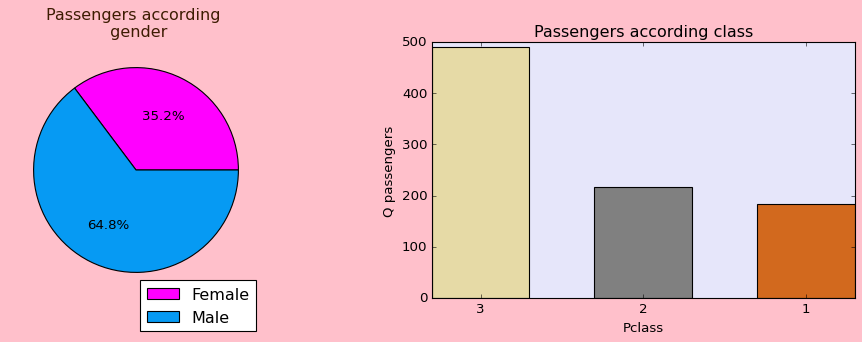

In [4]:
#Flow of passengers according gender & pclass
plt.style.use('classic')
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#1
ax1.pie(x='Passengers', colors=['#FF00FF', '#069AF3'], autopct="%0.1f%%", data=df_1)
ax1.set_title('Passengers according \n gender', color='#3D1C02')
ax1.legend(bbox_to_anchor=(1, 0.1), labels=['Female', 'Male'])
ax1.set_facecolor(color='#FFFFCB')
#2
ax2.bar(x=['3', '2', '1'], height='Passengers', color=['#E6DAA6', '#808080', '#D2691E'], data=df_2, width=0.6)
ax2.set_title('Passengers according class')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Q passengers')
ax2.set_facecolor(color='#E6E6FA')
fig.set_facecolor('#FFC0CB')
fig.show()

In the Titanic, the most passengers were men and travelled in 3rd class.

---

p_100  : 8.0 siblings
p_50  : 0.0 siblings



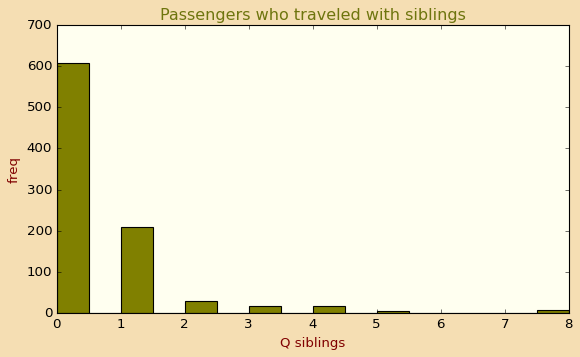

In [5]:
#Passengers with sibling on the Titanic
sibsp = data['SibSp'].sort_values(ascending=False)
print(f'p_100  : {np.percentile(sibsp, 100, axis=0)} siblings')
print(f'p_50  : {sibsp.median()} siblings')
print()
#Graphic:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.8, 0.6])
axes.hist(x=sibsp, color='#808000', bins=16)
axes.set_title('Passengers who traveled with siblings', color='#6E750E')
axes.set_xlabel('Q siblings', color='#800000')
axes.set_ylabel('freq', color='#800000')
axes.set_facecolor(color='#FFFFF0')
fig.set_facecolor(color='#F5DEB3')
fig.show()

50% of passengers traveled without siblings and the maximum quantity of them was of eight siblings. 

---

In [6]:
#Port of embarkation where more passengers went up.
df_embarked = data.copy()
df_embarked['Passengers'] = 1
df_embarked = df_embarked[df_embarked['Embarked'] != "Not Specified"]
df_embarked = df_embarked.pivot_table(index='Embarked', values='Passengers', aggfunc='sum')
df_embarked.sort_values('Passengers', ascending=False, inplace=True)

C = Cherbourg
Q = Queenstown
S = Southampton


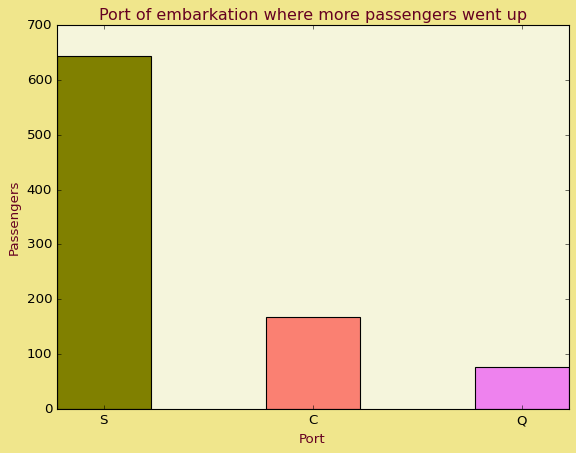

In [7]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.8, 0.8])
axes.bar(x=df_embarked.index, height='Passengers', color=('#808000', '#FA8072', '#EE82EE'), 
         data=df_embarked, width=0.45)
axes.set_title('Port of embarkation where more passengers went up', color='#650021')
axes.set_xlabel('Port', color='#650021')
axes.set_ylabel('Passengers', color='#650021')
axes.set_facecolor(color='#F5F5DC')
fig.set_facecolor(color='#F0E68C')
fig.show()
print('C = Cherbourg\nQ = Queenstown\nS = Southampton')

Southampton was the port of embarkation where more passengers went up on the Titanic.

---

In [8]:
blue, pink = sns.blend_palette(['#069AF3', '#DA70D6'])[::5]
palette_1 = {x:'y' for x in data.Sex.unique()}
palette_1['female'], palette_1['male'] = pink, blue

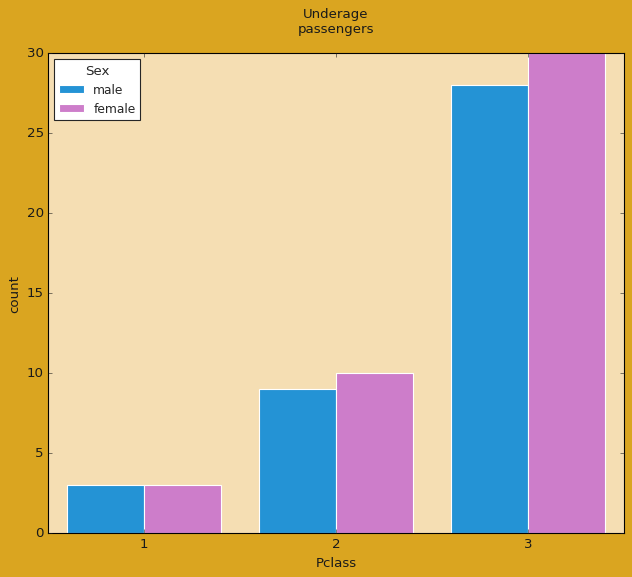

In [9]:
#Underage passengers
df_undp = data.copy()
df_undp = df_undp[df_undp['Age'] != 'Not Specified']
df_undp.loc[df_undp['Age'] < 1, ['Age']] = 1
df_undp = df_undp[df_undp['Age'] < 16]
#Graphic
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.9, 1])
sns.set_theme(style='white')
sns.countplot(data=df_undp, x='Pclass', hue='Sex', palette=palette_1)
axes.set_title('Underage\npassengers\n')
axes.set_xlabel('Pclass')
axes.set_ylabel('count')
axes.set_facecolor('#F5DEB3')
fig.set_facecolor('#DAA520')
plt.show()

The largest number of underage passengers on the Titanic were third-class and mostly girls. On the other hand, the first class had the least passengers and the ratio between girls and boys was the same.

In [10]:
#Boys who travelled with someone. 0=With Nanny or 1 or 2 = parents
df_companion = df_undp.loc[:, ['Pclass', 'Sex', 'Parch']]
df_companion['Companion'] = df_companion.apply(lambda x: 'Nanny' if x['Parch'] == 0 else 'Parents', axis=1)
# Most common companion(bar char united -> x=Pclass, legend=companion) | #2 & #1 United

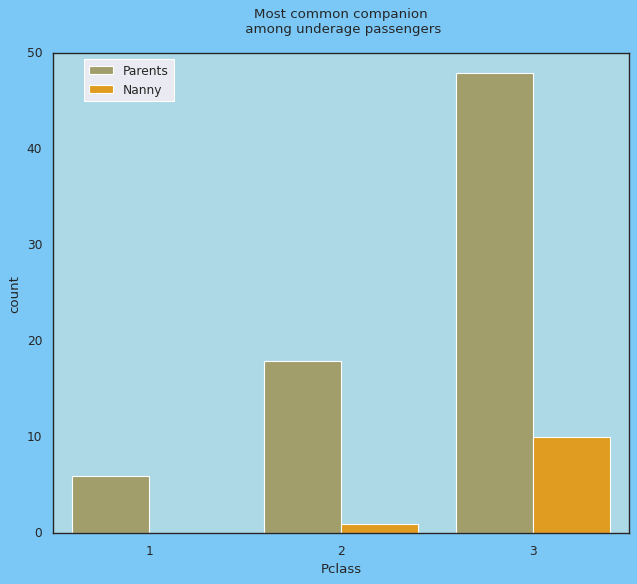

In [11]:
#Own palette
color_1, color_2 = sns.blend_palette(['#AAA662', '#FFA500'])[::5]
palette_2 = {x:'y' for x in df_companion.Companion.unique()}
palette_2['Parents'], palette_2['Nanny'] = color_1, color_2
#Graphic
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.9, 1])
sns.set_theme(style='dark')
sns.countplot(data=df_companion, x='Pclass', hue='Companion', palette=palette_2)
axes.set_title('Most common companion\n among underage passengers\n')
axes.legend(bbox_to_anchor=(0.22, 1))
axes.set_facecolor(color='#ADD8E6')
fig.set_facecolor('#7BC8F6')
plt.show()

Third-class was the most traveled with their parents and a nanny. On the other hand, first-class was the only one in which no passenger travelled with a nanny.

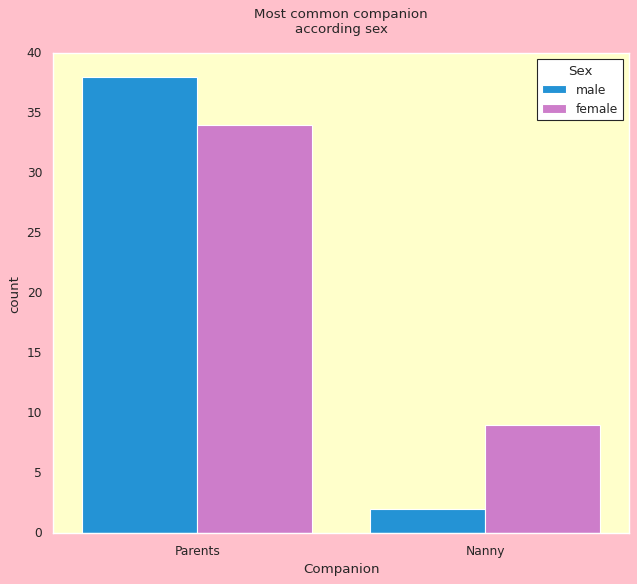

In [12]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.9, 1])
sns.set_theme(style='white')
sns.countplot(data=df_companion, x='Companion', hue='Sex', palette=palette_1)
axes.set_title('Most common companion\naccording sex\n')
axes.set_facecolor('#FFFFCB')
fig.set_facecolor('#FFC0CB')
plt.show()

It can be seen that the parents were the most common companion among minor passengers. Likewise, the boys were the ones who traveled the most with them. On the other hand, the girls were the ones who most traveled the most with a nanny.

In [13]:
table = df_companion.pivot_table(index=['Pclass', 'Sex'], columns='Companion', values='Parch', aggfunc='count')
table.fillna(0, inplace=True)
table['Total'] = table.apply(lambda x: x['Nanny'] + x['Parents'], axis=1)
table

Companion      Nanny  Parents  Total
Pclass Sex                          
1      female    0.0      3.0    3.0
       male      0.0      3.0    3.0
2      female    1.0      9.0   10.0
       male      0.0      9.0    9.0
3      female    8.0     22.0   30.0
       male      2.0     26.0   28.0

---

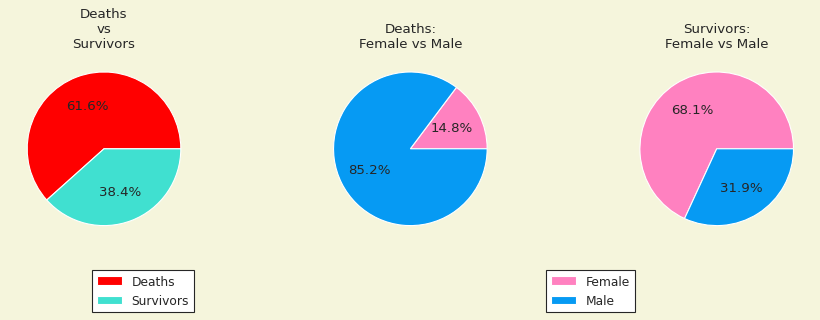

In [15]:
def create_table(df):
  table = df.pivot_table(index='Sex', columns='State', values='', aggfunc='sum')
  total_row = pd.DataFrame({
      'Died': np.sum(table['Died']), 
      'Survived': np.sum(table['Survived'])
    }, index=['Total'])
  table = pd.concat([table, total_row], axis=0)
  return table

#Deaths & Survivors
df_stats = data.loc[:, ['Survived', 'Pclass', 'Sex']]
df_stats['State'] = df_stats.apply(lambda x: 'Died' if x['Survived'] == 0 else 'Survived', axis=1)
df_stats[''] = 1
table_1 = create_table(df_stats)
#Graphics
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
#1
ax1.pie(x=table_1.iloc[-1, :], colors=('#FF0000', '#40E0D0'), autopct="%0.1f%%")
ax1.set_title('Deaths\nvs\nSurvivors')
ax1.legend(labels=('Deaths', 'Survivors'), bbox_to_anchor=(1, -0.1))
#2
ax2.pie(x=table_1.iloc[:-1, 0], colors=('#FF81C0', '#069AF3'), autopct="%0.1f%%")
ax2.set_title('Deaths:\nFemale vs Male')
ax2.legend(labels=('Female', 'Male'), bbox_to_anchor=(1.7, -0.1))
#3
ax3.pie(x=table_1.iloc[:-1, 1], colors=('#FF81C0', '#069AF3'), autopct="%0.1f%%")
ax3.set_title('Survivors:\nFemale vs Male')
fig.set_facecolor('#F5F5DC')
fig.show()


More than 50% of passengers died in the Titanic and the most of them were men. The reason of this is because women had priority when they were land of ship. 

---

In [16]:
data['Fare'] = data.apply(lambda x: round(x['Fare'], 2), axis=1)

In [17]:
df = data.copy()
null_age = df[df['Age'] == 'Not Specified']
df.drop(null_age.index, axis=0, inplace=True)
df[df['Age'] == 'Not Specified']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [18]:
def percentil(field):
  p_75 = np.percentile(df[field], 75, axis=0)
  p_25 = np.percentile(df[field], 25, axis=0)
  median = df[field].median()
  return round(p_75, 2), round(p_25, 2), round(median, 2)

fare = percentil('Fare')
age = percentil('Age')
df_ = pd.DataFrame({
    'p_75': [fare[0], age[0]],
    'p_25': [fare[1], age[1]],
    'median': [fare[2], age[2]]
}, index=['Fare', 'Age'])

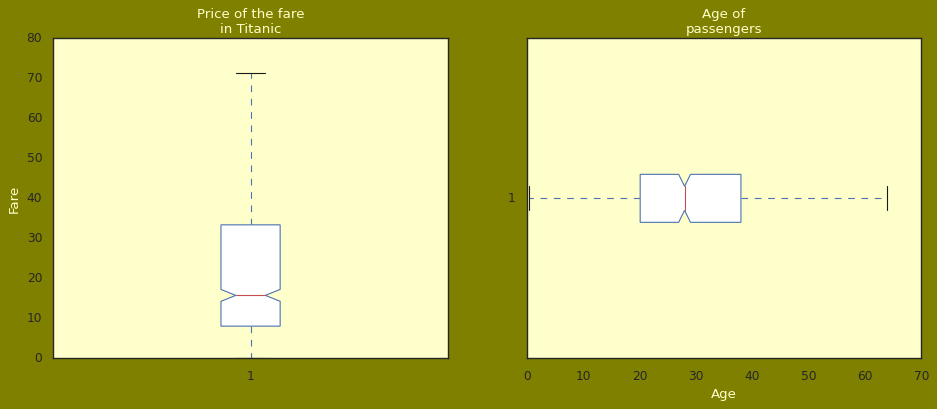

In [19]:
#Boxplot about Fare & Boxplot about Age
fig, [ax1, ax2]= plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
#1
ax1.boxplot(x='Fare', data=df, patch_artist=True, notch=True, showfliers=False)
ax1.set_facecolor('#FFFFCB')
ax1.set_title('Price of the fare\nin Titanic', color='#FFFFCB')
ax1.set_ylabel('Fare', color='#FFFFCB')
#2
ax2.boxplot(x='Age', data=df, patch_artist=True, notch=True, showfliers=False, vert=False)
ax2.set_title('Age of\npassengers', color='#FFFFCB')
ax2.set_xlabel('Age', color='#FFFFCB')
ax2.set_facecolor('#FFFFCB')
fig.set_facecolor('#808000')
fig.show()

In [20]:
df_

,p_75,p_25,median
Fare,33.38,8.05,15.74
Age,38.00,20.12,28.00


*   The most of passengers in Titanic paid a fare between $33.38 - 8.05 aproximately per ticket and they were between 38 and 20 years old.

* 50% of passengers that arrived to the Titanic paid less than $15.74 per ticket and they were less than 28 years old.

---

In [21]:
def pclass(df, n):
  df_copy = df.copy()
  df_copy = df_copy[df_copy['Pclass'] == n]
  df_copy['Passengers'] = 1
  df_copy['State'] = df_copy.apply(lambda x: 'Died' if x['Survived'] == 0 else 'Survived', axis=1)
  return df_copy

def flow_of_passengers(df):
  table = df.pivot_table(index='Sex', values='Passengers', aggfunc='sum')
  return table

def age_of_passengers(df):
  df_copy = df.copy()
  df_copy = df_copy[df_copy['Age'] != 'Not Specified']
  return df_copy

def died_survived(df):
  table2 = df.pivot_table(index='Sex', columns='State', values='Survived', aggfunc='count')
  total_sum = pd.DataFrame({'Died': np.sum(table2['Died']), 
                          'Survived': np.sum(table2['Survived'])
                          }, index=['Total'])
  table2 = pd.concat([table2, total_sum], axis=0)
  return table2

def port_embarkation(df):
  table3 = df.copy()
  table3 = table3[table3['Embarked'] != 'Not Specified']
  table3 = table3.pivot_table(index='Embarked', values='Passengers', aggfunc='sum')
  table3.sort_values('Passengers', ascending=False, inplace=True)
  return table3

             
def companion(df):
  companion_pc1 = df.copy()
  def companion_1(x):
    if x == 0:
      return 1
    elif x > 0:
      return 0
  def companion_2(x):
    if x == 2:
      return 'Parents & sibs'
    elif x==1:
      return 'Parents or sibs'
    elif x==0:
      return 'Alone' 
  adults = companion_pc1.copy()
  cond_1, cond_2 = adults['Age'] != 'Not Specified', adults['Parch'] != 'Not Specified' #conditions
  adults = adults[cond_1 & cond_2]  #Filter data.
  adults = adults[adults['Age'] > 16]   #Select only adult passengers.
  adults['Siblings'], adults['Parents'] = adults['SibSp'].apply(companion_1), adults['Parch'].apply(companion_1) #To know who was him/her companion
  adults[''] = adults.apply(lambda x: x['Siblings'] + x['Parents'], axis=1)
  adults['Companion'] = adults[''].apply(companion_2) #A column more explicity. 
  table4_pc1 = adults.pivot_table(index='Companion', columns='Sex', values='Passengers', aggfunc='sum')
  table4_pc1['Total'] = table4_pc1.apply(lambda x: x['female'] + x['male'], axis=1)
  return table4_pc1

def stadistic_data(df):
  fare_pclass1 = df['Fare']
  p_75 = np.percentile(fare_pclass1, 75, axis=0)
  p_25 = np.percentile(fare_pclass1, 25, axis=0)
  median = fare_pclass1.median()
  return p_75, p_25, median

#Analysis per class

Pclass 1

In [22]:
pclass_1 = pclass(data, 1)

---

In [23]:
table1_pc1 = flow_of_passengers(pclass_1)
table1_pc1

,Passengers
Sex,
female,94
male,122


In [24]:
age_pclass1 = age_of_passengers(pclass_1)

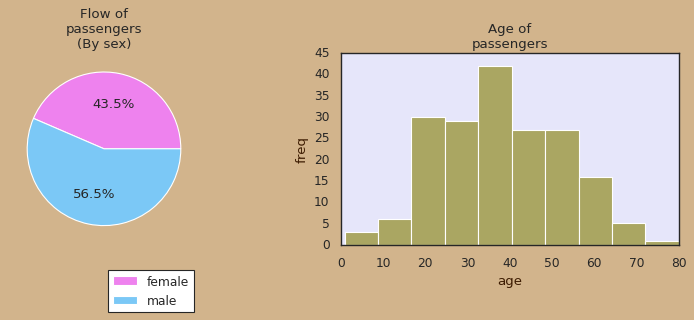

In [25]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
#1
ax1.pie(x='Passengers', autopct="%0.1f%%", colors=('#EE82EE', '#7BC8F6'), data=table1_pc1)
ax1.legend(labels=['female', 'male'], bbox_to_anchor=[1, -0.1])
ax1.set_title('Flow of\npassengers\n(By sex)')
#2
ax2.hist(x='Age', bins=10, color='#AAA662', data=age_pclass1)
ax2.set_title('Age of\npassengers', )
ax2.set_xlabel('age', color='#3D1C02')
ax2.set_ylabel('freq', color='#3D1C02')
ax2.set_facecolor(color='#E6E6FA')
fig.set_facecolor('#D2B48C')
fig.show()

The most of passengers in class 1 were men and were between 32 and 40 years old.

---

In [26]:
table2_pc1 = died_survived(pclass_1)
table2_pc1

,Died,Survived
female,3,91
male,77,45
Total,80,136


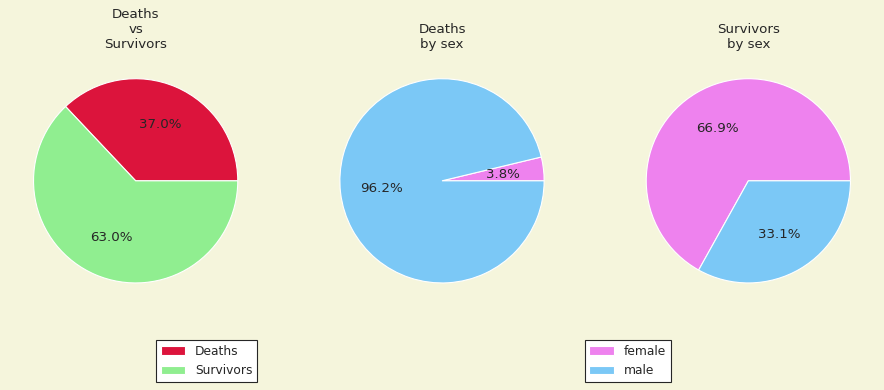

In [27]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(14, 9))
#1
ax1.pie(x=table2_pc1.iloc[-1, :], autopct='%0.1f%%', colors=['#DC143C', '#90EE90'])
ax1.set_title('Deaths\nvs\nSurvivors')
ax1.legend(labels=['Deaths', 'Survivors'], bbox_to_anchor=[1, -0.1])
#2
ax2.pie(x=table2_pc1.iloc[:-1, 0], autopct='%0.1f%%', colors=['#EE82EE', '#7BC8F6'])
ax2.set_title('Deaths\nby sex')
ax2.legend(labels=['female', 'male'], bbox_to_anchor=(1.42, -0.1))
#3
ax3.pie(x=table2_pc1.iloc[:-1, 1], autopct="%0.1f%%", colors=['#EE82EE', '#7BC8F6'])
ax3.set_title('Survivors\nby sex')
fig.set_facecolor('#F5F5DC')
fig.show()

There were more deaths than survivors at the class 1 and the women were the ones who had most survivors.

---

In [28]:
table3_pc1 = port_embarkation(pclass_1)
table3_pc1

,Passengers
Embarked,
S,127
C,85
Q,2


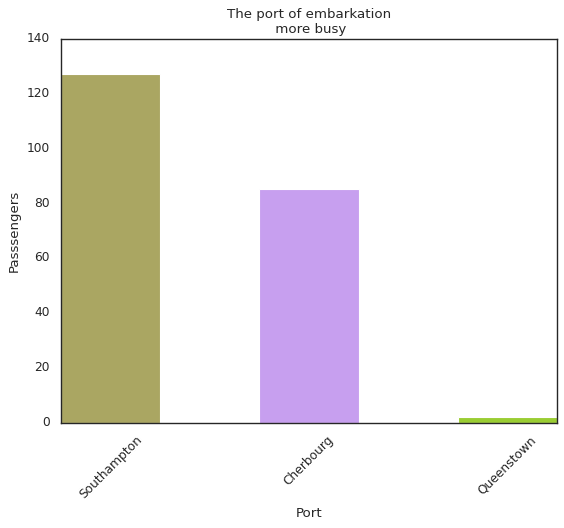

In [29]:
plt.bar(x=table3_pc1.index, height='Passengers', data=table3_pc1, width=0.5, color=['#AAA662', '#C79FEF', '#9ACD32'])
plt.title('The port of embarkation\n more busy')
plt.xlabel('Port')
plt.ylabel('Passsengers')
plt.xticks(np.arange(3), ['Southampton', 'Cherbourg', 'Queenstown'], rotation=45)
plt.show()

Southampton was the port of embarkation where the most of passengers of class 1 went.

---

In [30]:
avg_fare_pc1 = pclass_1['Fare']

In [31]:
table4_pc1 = companion(pclass_1)
table4_pc1

Sex,female,male,Total
Companion,,,
Alone,13,8,21
Parents & sibs,31,54,85
Parents or sibs,35,36,71


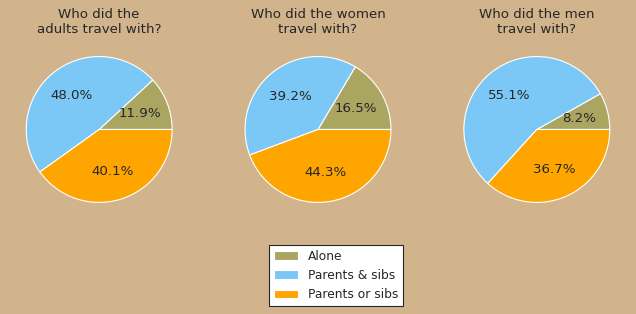

In [32]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(10, 9))
ax1.pie(x='Total', autopct="%0.1f%%", data=table4_pc1, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax1.set_title('Who did the\nadults travel with?')
ax1.legend(labels=table4_pc1.index, bbox_to_anchor=(2.2, -0.1))
ax2.pie(x='female', autopct='%0.1f%%', data=table4_pc1, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax2.set_title('Who did the women\ntravel with?')
ax3.pie(x='male', autopct="%0.1f%%", data=table4_pc1, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax3.set_title('Who did the men\ntravel with?')
fig.set_facecolor(color='#D2B48C')
fig.show()

*   In general, the most of passengers travelled with their parents ***and*** siblings.

*   The most of women travelled either with their parents ***or*** siblings.

*   The most of men travelled with both parents and siblings.

---

In [33]:
stadistic_pclass1 = stadistic_data(pclass_1)
print(f'p_75: {stadistic_pclass1[0]}')
print(f'p_25: {stadistic_pclass1[1]}')
print(f'median: {stadistic_pclass1[2]}')

p_75: 93.5
p_25: 30.925
median: 60.285


In [34]:
fare_price = pclass_1['Fare']
print(f'Max fare price: {np.max(fare_price)}')
pclass_1.describe().iloc[[-1], [-2]]

Max fare price: 512.33


,Fare
max,512.33


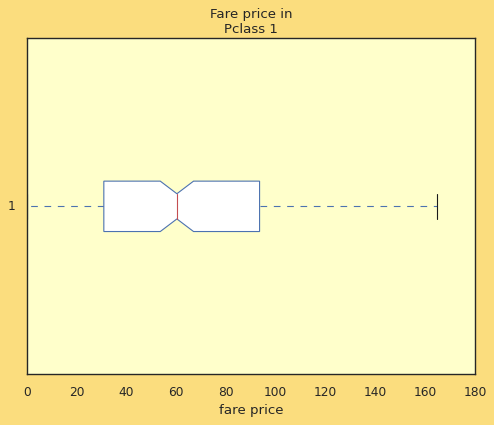

In [35]:
#Average Fare
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.7, 0.7])
axes.boxplot(x='Fare', notch=True, patch_artist=True, vert=False, showfliers=False, data=pclass_1)
axes.set_title('Fare price in\nPclass 1')
axes.set_xlabel('fare price')
axes.set_facecolor(color='#FFFFCB')
fig.set_facecolor(color='#FBDD7E')
fig.show()

*   In Pclass 1, the data distribution about fare price is between $93.5 - 30.92 .

*   50% of passengers paid a ticket for less than $60.29.

* The most expensive ticket of Titanic was sell in Pclass1 and was of $512.33.  

---

Pclass 2

In [36]:
pclass_2 = pclass(data, 2)

In [37]:
table1_pc2 = flow_of_passengers(pclass_2)
table1_pc2

,Passengers
Sex,
female,76
male,108


In [38]:
age_pclass2 = age_of_passengers(pclass_2)


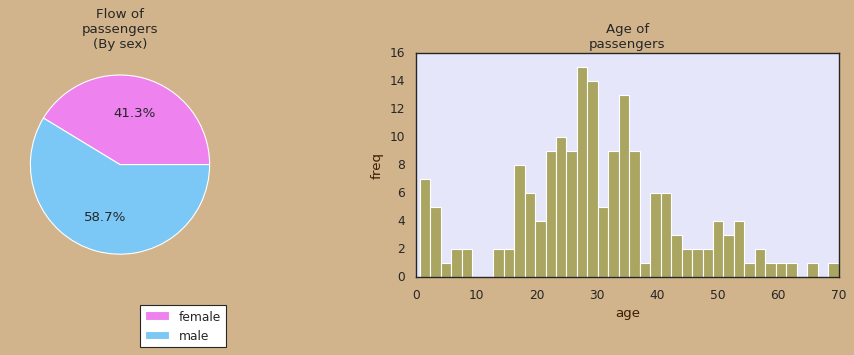

In [39]:
#Graphic
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 3.5))
#1
ax1.pie(x='Passengers', autopct="%0.1f%%", colors=('#EE82EE', '#7BC8F6'), data=table1_pc2)
ax1.legend(labels=['female', 'male'], bbox_to_anchor=(1, -0.1))
ax1.set_title('Flow of\npassengers\n(By sex)')
#2
ax2.hist(x='Age', bins=40,  color='#AAA662', data=age_pclass2)
ax2.set_title('Age of\npassengers', )
ax2.set_xlabel('age', color='#3D1C02')
ax2.set_ylabel('freq', color='#3D1C02')
ax2.set_facecolor(color='#E6E6FA')
fig.set_facecolor('#D2B48C')
fig.show()

Most of the passengers were men and  were between 20 and 30 years old.



In [40]:
table2_pc2 = died_survived(pclass_2)
table2_pc2

,Died,Survived
female,6,70
male,91,17
Total,97,87


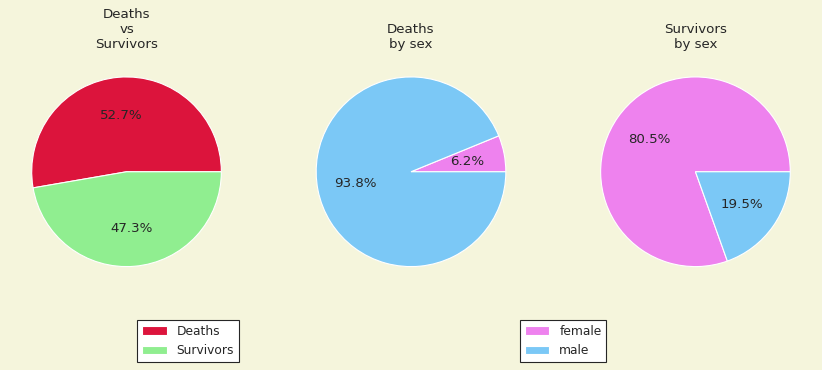

In [41]:
#Graphic
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(13, 13))
#1
ax1.pie(x=table2_pc2.iloc[-1, :], autopct="%0.1f%%", colors=['#DC143C', '#90EE90'])
ax1.legend(labels=['Deaths', 'Survivors'], bbox_to_anchor=(1, -0.1))
ax1.set_title('Deaths\nvs\nSurvivors')
#2
ax2.pie(x=table2_pc2.iloc[:-1, 0], autopct="%0.1f%%", colors=['#EE82EE', '#7BC8F6'])
ax2.legend(labels=['female', 'male'], bbox_to_anchor=(1.35, -0.1))
ax2.set_title('Deaths\nby sex')
#3
ax3.pie(x=table2_pc2.iloc[:-1, 1], autopct="%0.1f%%", colors=['#EE82EE', '#7BC8F6'])
ax3.set_title('Survivors\nby sex')
fig.set_facecolor('#F5F5DC')
fig.show()

There were more deaths than survivors and the most affected were the men and this can be seen in the immense difference that exists in the second pie chart.   




In [42]:
table3_pc2 = port_embarkation(pclass_2)
table3_pc2

,Passengers
Embarked,
S,164
C,17
Q,3


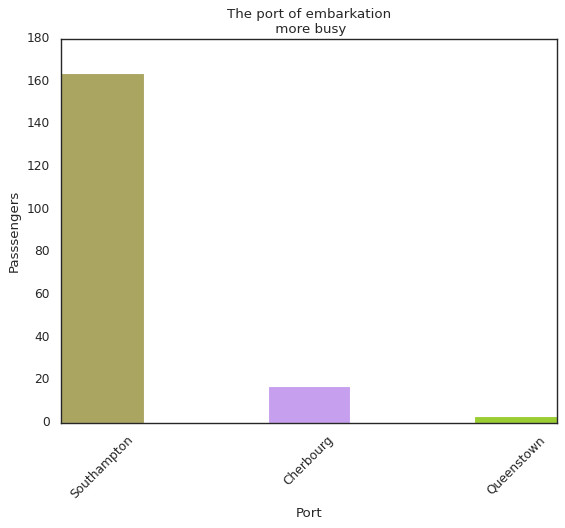

In [43]:
#Graphic
plt.bar(x=table3_pc2.index, height='Passengers', data=table3_pc2, width=0.4, color=['#AAA662', '#C79FEF', '#9ACD32'])
plt.xticks(np.arange(3), ['Southampton', 'Cherbourg', 'Queenstown'], rotation=45)
plt.title('The port of embarkation\n more busy')
plt.xlabel('Port')
plt.ylabel('Passsengers')
plt.show()

In the same way as the first class, the most popular port of embarkation was Southampton and the least popular was Queenstown.

In [44]:
table4_pc2 = companion(pclass_2)
table4_pc2

Sex,female,male,Total
Companion,,,
Alone,14,8,22
Parents & sibs,30,61,91
Parents or sibs,20,19,39


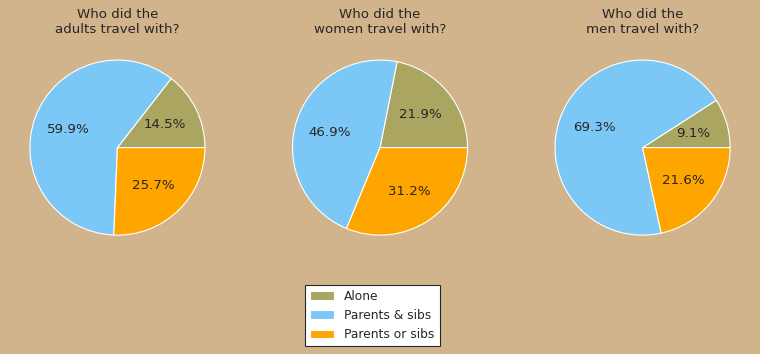

In [45]:
#Graphic
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
#1
ax1.pie(x='Total', autopct="%0.1f%%", data=table4_pc2, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax1.set_title('Who did the\nadults travel with?')
#2
ax2.pie(x='female', autopct="%0.1f%%", data=table4_pc2, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax2.set_title('Who did the\nwomen travel with?')
#3
ax3.pie(x='male', autopct="%0.1f%%", data=table4_pc2, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax3.set_title('Who did the\nmen travel with?')
ax3.legend(labels=['Alone', 'Parents & sibs', 'Parents or sibs'], bbox_to_anchor=(-0.4, -0.1))
fig.set_facecolor(color='#D2B48C')
fig.show()

Most of adults who were in the second class on the Titanic traveled together to their parents and siblings.

In [46]:
stadistic_pclass2 = stadistic_data(pclass_2)
print(f'p_75: {stadistic_pclass2[0]}')
print(f'p_25: {stadistic_pclass2[1]}')
print(f'median: {stadistic_pclass2[2]}')

p_75: 26.0
p_25: 13.0
median: 14.25


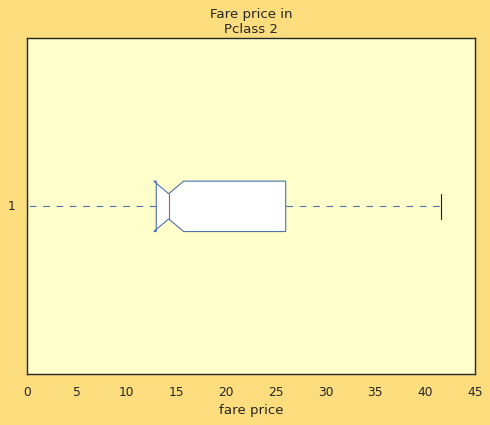

In [47]:
#Graphic
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.7, 0.7])
axes.boxplot(x='Fare', notch=True, patch_artist=True, vert=False, showfliers=False, data=pclass_2)
axes.set_title('Fare price in\nPclass 2')
axes.set_xlabel('fare price')
axes.set_facecolor(color='#FFFFCB')
fig.set_facecolor(color='#FBDD7E')
fig.show()

*  Most passengers paid a ticket between $26 - 13.

*  50% of passengers paid a ticket of less than $14.25.

In [48]:
free_ticket = data.loc[data['Fare'] == 0, ['Pclass', 'Fare']]
free_ticket = free_ticket.pivot_table(index='Pclass', values='Fare', aggfunc='count')
free_ticket.sort_values('Fare', ascending=False)

,Fare
Pclass,
2,6
1,5
3,4


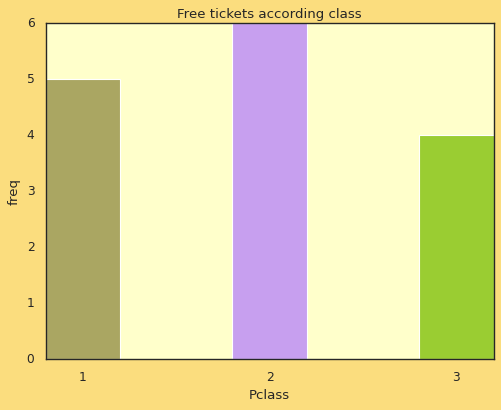

In [49]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.7, 0.7])
axes.bar(x=['1', '2', '3'], height='Fare', data=free_ticket, width=0.4, color=['#AAA662', '#C79FEF', '#9ACD32'])
axes.set_title('Free tickets according class')
axes.set_xlabel('Pclass')
axes.set_ylabel('freq')
axes.set_facecolor(color='#FFFFCB')
fig.set_facecolor(color='#FBDD7E')
fig.show()

The second class was which the most awarded free tickets.

---

Pclass 3

In [50]:
pclass_3 = pclass(data, 3)

In [51]:
table1_pc3 = flow_of_passengers(pclass_3)
table1_pc3

,Passengers
Sex,
female,144
male,347


In [52]:
age_pclass3 = age_of_passengers(pclass_3)

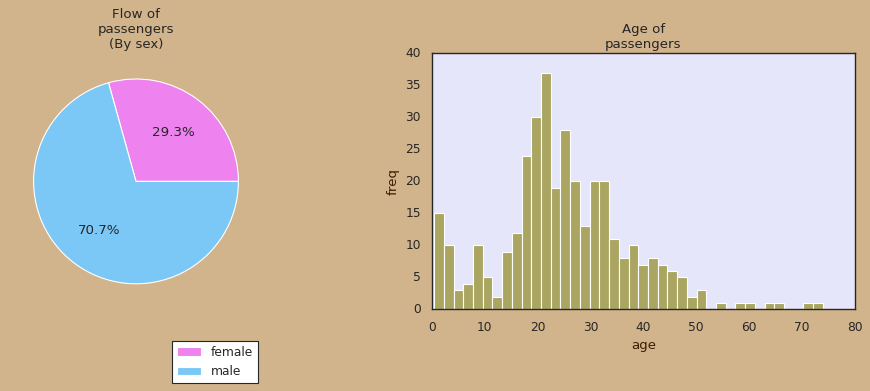

In [53]:
#Graphic
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#1
ax1.pie(x='Passengers', autopct="%0.1f%%", data=table1_pc3, colors=('#EE82EE', '#7BC8F6'))
ax1.legend(labels=['female', 'male'], bbox_to_anchor=(1, -0.1))
ax1.set_title('Flow of\npassengers\n(By sex)')
#2
ax2.hist(x='Age', data=age_pclass3, bins=40, color='#AAA662')
ax2.set_title('Age of\npassengers', )
ax2.set_xlabel('age', color='#3D1C02')
ax2.set_ylabel('freq', color='#3D1C02')
ax2.set_facecolor(color='#E6E6FA')
fig.set_facecolor('#D2B48C')
fig.show()

Here as in the other classes the men were in the majority and the age of passengers was between 20 and 25 years old.

In [54]:
table2_pc3 = died_survived(pclass_3)
table2_pc3

,Died,Survived
female,72,72
male,300,47
Total,372,119


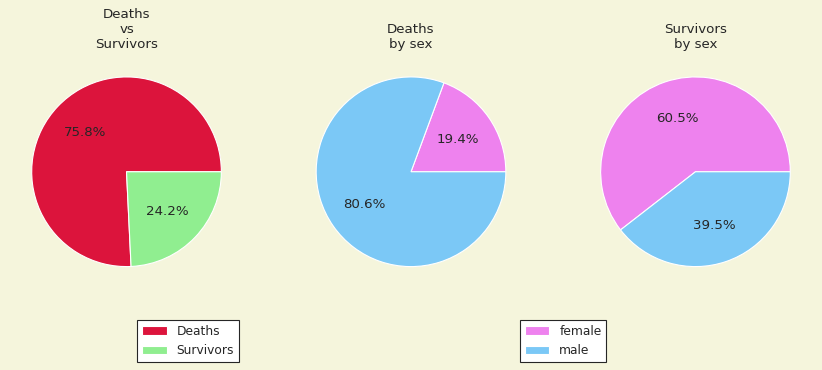

In [55]:
#Graphic
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(13, 13))
#1
ax1.pie(x=table2_pc3.iloc[-1, :], autopct="%0.1f%%", colors=['#DC143C', '#90EE90'])
ax1.legend(labels=['Deaths', 'Survivors'], bbox_to_anchor=(1, -0.1))
ax1.set_title('Deaths\nvs\nSurvivors')
#2
ax2.pie(x=table2_pc3.iloc[:-1, 0], autopct="%0.1f%%", colors=['#EE82EE', '#7BC8F6'])
ax2.legend(labels=['female', 'male'], bbox_to_anchor=(1.35, -0.1))
ax2.set_title('Deaths\nby sex')
#3
ax3.pie(x=table2_pc3.iloc[:-1, 1], autopct="%0.1f%%", colors=['#EE82EE', '#7BC8F6'])
ax3.set_title('Survivors\nby sex')
fig.set_facecolor('#F5F5DC')
fig.show()

This was the most affected class and one can know it at a glance in the first pie chart.

In [56]:
table3_pc3 = port_embarkation(pclass_3)
table3_pc3

,Passengers
Embarked,
S,353
Q,72
C,66


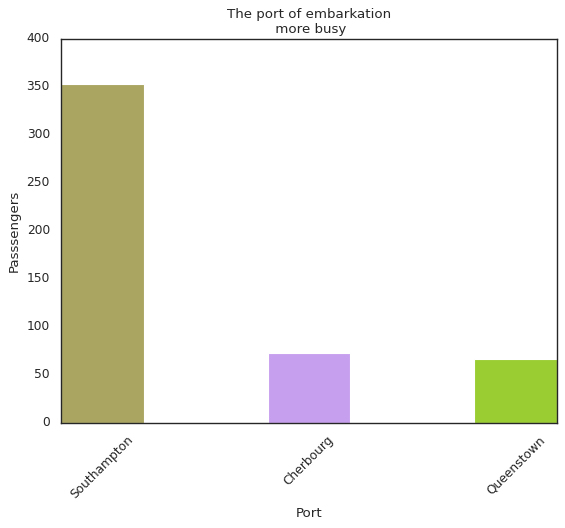

In [57]:
#Graphic
plt.bar(x=table3_pc3.index, height='Passengers', data=table3_pc3, width=0.4, color=['#AAA662', '#C79FEF', '#9ACD32'])
plt.xticks(np.arange(3), ['Southampton', 'Cherbourg', 'Queenstown'], rotation=45)
plt.title('The port of embarkation\n more busy')
plt.xlabel('Port')
plt.ylabel('Passsengers')
plt.show()

Here as in the other classes, the most popular port of embarkation was Southampton and the least popular was Queenstown.

In [58]:
table4_pc3 = companion(pclass_3)
table4_pc3

Sex,female,male,Total
Companion,,,
Alone,13,11,24
Parents & sibs,31,181,212
Parents or sibs,25,24,49


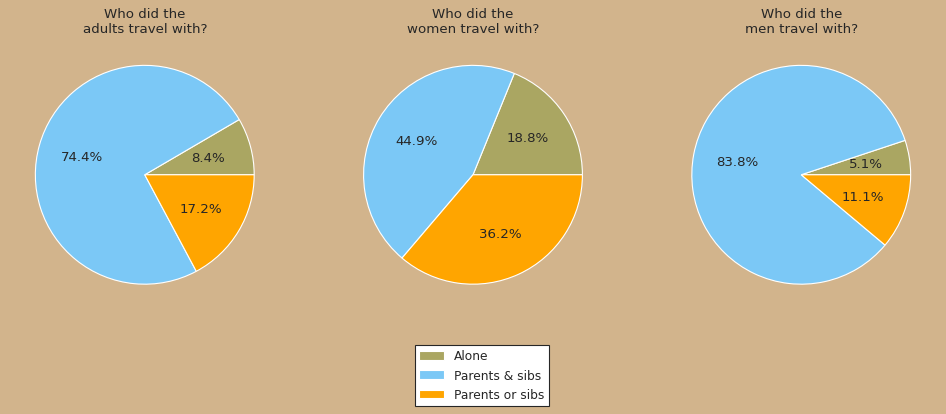

In [59]:
#Graphic
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
#1
ax1.pie(x='Total', autopct="%0.1f%%", data=table4_pc3, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax1.set_title('Who did the\nadults travel with?')
#2
ax2.pie(x='female', autopct="%0.1f%%", data=table4_pc3, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax2.set_title('Who did the\nwomen travel with?')
#3
ax3.pie(x='male', autopct="%0.1f%%", data=table4_pc3, colors=['#AAA662', '#7BC8F6', '#FFA500'])
ax3.set_title('Who did the\nmen travel with?')
ax3.legend(labels=['Alone', 'Parents & sibs', 'Parents or sibs'], bbox_to_anchor=(-0.4, -0.1))
fig.set_facecolor(color='#D2B48C')
fig.show()

The vast majority of passengers traveled together to their parents and siblings. In addition, this was the class where most of the passengers traveled with these companions. And one can understand why this is only by looking at the vast majority of men who traveled with parents and siblings.



In [60]:
stadistic_pclass3 = stadistic_data(pclass_3)
print(f'p_75: {stadistic_pclass3[0]}')
print(f'p_25: {stadistic_pclass3[1]}')
print(f'median: {stadistic_pclass3[2]}')

p_75: 15.5
p_25: 7.75
median: 8.05


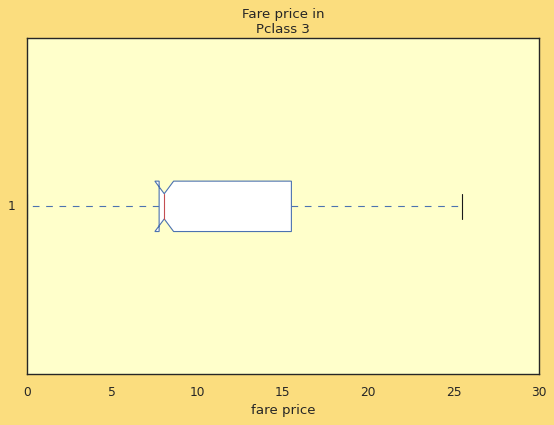

In [61]:
#Graphic
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.8, 0.7])
axes.boxplot(x='Fare', notch=True, patch_artist=True, vert=False, showfliers=False, data=pclass_3)
axes.set_title('Fare price in\nPclass 3')
axes.set_xlabel('fare price')
axes.set_facecolor(color='#FFFFCB')
fig.set_facecolor(color='#FBDD7E')
fig.show()

*   As the lowest class, most passengers paid between $(15.5 - 7.75) for a ticket.

*  50% of passengers paid less than $8.05 for a ticket. 